In [27]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [73]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
batch_size = 1
epochs = 10

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

LAYER_ONE_SIZE = 10
LAYER_TWO_SIZE = 10
LAYER_THREE_SIZE = 10



Using cpu device
Shape of X [N, C, H, W]: torch.Size([1, 1, 28, 28])
Shape of y: torch.Size([1]) torch.int64


In [75]:
# Define model
class NeuralNetwork1(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 19),
            nn.ReLU(),
            nn.Linear(19, 10)
            # nn.ReLU(),
            # nn.Linear(LAYER_TWO_SIZE, LAYER_THREE_SIZE)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Define model
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 10),
            nn.ReLU(),
            nn.Linear(10, 10)
            # nn.ReLU(),
            # nn.Linear(LAYER_TWO_SIZE, LAYER_THREE_SIZE)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return (100*correct)

model1 = NeuralNetwork1().to(device)
model2 = NeuralNetwork2().to(device)
print(model1, model2)
loss_fn = nn.CrossEntropyLoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=1e-3)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=1e-3)

NeuralNetwork1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=19, bias=True)
    (1): ReLU()
    (2): Linear(in_features=19, out_features=10, bias=True)
  )
) NeuralNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)


In [76]:
epochs = 5
start1 = time.time()
for t in range(epochs):
    print(f"Model 1 Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model1, loss_fn, optimizer1)
    test(test_dataloader, model1, loss_fn)
    print(f"Model 2 Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model2, loss_fn, optimizer2)
    test(test_dataloader, model2, loss_fn)
end1 = time.time()
print("Done!", end1-start1)

# start2 = time.time()
# for t in range(epochs):
#     print(f"Model 2 Epoch {t+1}\n-------------------------------")
#     train(train_dataloader, model2, loss_fn, optimizer2)
#     test(test_dataloader, model2, loss_fn)
# end2 = time.time()
# print("Done with model 2!", end2-start2)

Model 1 Epoch 1
-------------------------------
loss: 2.359546  [    1/60000]
loss: 2.328049  [  101/60000]
loss: 1.975251  [  201/60000]
loss: 2.408373  [  301/60000]
loss: 2.035391  [  401/60000]
loss: 2.254632  [  501/60000]
loss: 2.213727  [  601/60000]
loss: 2.490330  [  701/60000]
loss: 2.181628  [  801/60000]
loss: 2.193582  [  901/60000]
loss: 1.972268  [ 1001/60000]
loss: 2.151275  [ 1101/60000]
loss: 1.879653  [ 1201/60000]
loss: 1.967886  [ 1301/60000]
loss: 1.926148  [ 1401/60000]
loss: 2.178302  [ 1501/60000]
loss: 2.082779  [ 1601/60000]
loss: 1.808573  [ 1701/60000]
loss: 1.804858  [ 1801/60000]
loss: 1.953662  [ 1901/60000]
loss: 2.323823  [ 2001/60000]
loss: 0.712791  [ 2101/60000]
loss: 1.908410  [ 2201/60000]
loss: 1.467069  [ 2301/60000]
loss: 2.168436  [ 2401/60000]
loss: 0.788133  [ 2501/60000]
loss: 1.935666  [ 2601/60000]
loss: 1.269061  [ 2701/60000]
loss: 1.557742  [ 2801/60000]
loss: 2.304281  [ 2901/60000]
loss: 2.642488  [ 3001/60000]
loss: 1.097219  [ 3101

In [43]:

from fxpmath import Fxp

In [44]:
[Fxp(k, dtype='S5.27') for k in [1.1,2.6,3.9]]


[fxp-s32/27(1.0999999940395355),
 fxp-s32/27(2.5999999940395355),
 fxp-s32/27(3.899999998509884)]

In [45]:
Fxp(np.ones(50),dtype='S1.1')


fxp-s2/1([0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
          0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
          0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5])

In [83]:
model1.linear_relu_stack[2].weight.flatten()

tensor([-0.4131,  0.6626,  0.2218, -0.3484,  0.3255, -0.0606,  0.2936, -0.3163,
         0.2370, -0.1012,  0.7381,  0.4165, -0.5253,  0.3133, -0.4752,  0.3344,
         0.5585, -0.6326, -0.1756, -0.7360, -0.3613, -0.1458,  0.1684, -0.3933,
         0.6961, -0.4655,  0.2333,  0.0695, -0.4293,  0.1621, -0.0841,  1.3085,
        -0.7009, -0.5903, -0.4450,  0.2652,  0.1713,  0.0871,  0.2053,  0.2666,
         0.5293,  0.0119, -0.4067, -0.3169,  0.4479, -1.1911,  0.7255,  1.0117,
        -0.2502, -0.1392,  0.6629,  0.6056, -0.4818,  0.2264, -0.5656, -0.4383,
         0.3607,  0.0967, -0.4317, -0.3379,  0.3798,  0.8471,  0.7665, -0.4647,
        -0.4648, -0.3860,  0.1949, -1.0131, -0.0970,  0.1935,  0.9233, -0.5777,
         0.1220, -0.5396,  0.3759,  0.1657,  0.5846,  0.5150,  0.0420,  0.1053,
        -0.5537, -0.6243, -0.6617,  0.4464,  0.0265, -0.0637,  0.5702, -0.1271,
        -0.8850, -1.0130,  0.1771, -0.5958,  0.2727,  0.7603,  0.7778, -0.4138,
        -0.4762, -0.5175,  0.4020, -0.60

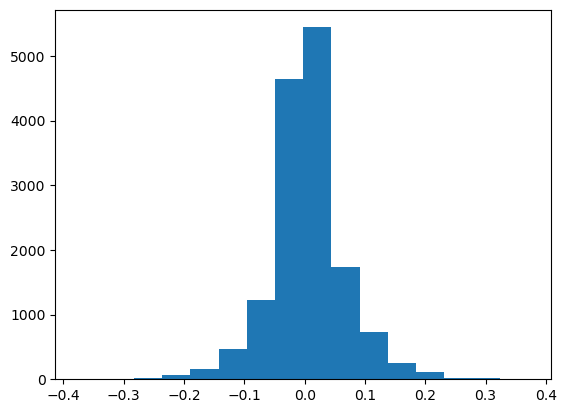

In [95]:
import matplotlib.pyplot as plt
plt.hist(model1.linear_relu_stack[0].weight.flatten().detach().numpy(),bins=16)
plt.show()

-0.814666 0.7665317


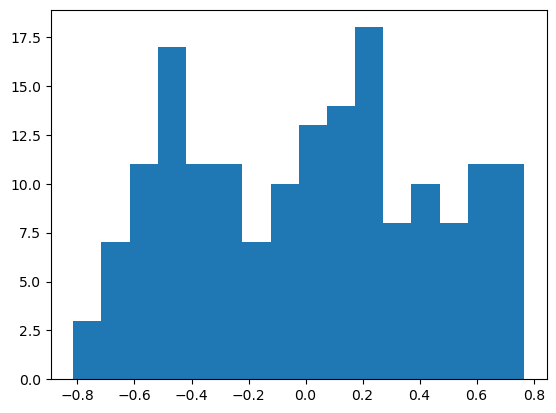

In [91]:
h = model1.linear_relu_stack[2].weight.flatten().detach().numpy()
lower_bound = np.percentile(h,5)
upper_bound = np.percentile(h,95)
mask = (h >= lower_bound) & (h <= upper_bound)
plt.hist(h[mask],bins=16)
print(np.min(h[mask]), np.max(h[mask]))

In [87]:
np.p

array([-0.4131376 ,  0.66256833,  0.22177415, -0.34844634,  0.325507  ,
       -0.06056944,  0.29363045, -0.31633782,  0.23702872, -0.10115826,
        0.7380971 ,  0.41647473, -0.5252682 ,  0.31325004, -0.4751672 ,
        0.33441284,  0.55850375, -0.63263917, -0.17559588, -0.7360057 ,
       -0.3613002 , -0.14575185,  0.16841058, -0.39334488,  0.69612324,
       -0.46548188,  0.23330945,  0.06951343, -0.42931315,  0.16206193,
       -0.08413572,  1.308486  , -0.7008661 , -0.5903203 , -0.44499668,
        0.26516804,  0.17127302,  0.08705451,  0.20532636,  0.26659346,
        0.5292661 ,  0.01188142, -0.40666437, -0.31686094,  0.44790998,
       -1.191074  ,  0.72550195,  1.0116519 , -0.25021094, -0.13916676,
        0.6628509 ,  0.60557795, -0.48183417,  0.22644643, -0.5656215 ,
       -0.43825868,  0.36069617,  0.09669585, -0.43172872, -0.33793375,
        0.3798293 ,  0.847118  ,  0.7665317 , -0.4647308 , -0.46479166,
       -0.3860333 ,  0.19494222, -1.0131137 , -0.09696457,  0.19